/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


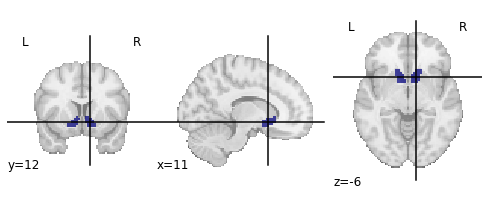

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022


In [6]:
import os 
import pandas as pd
from nilearn import plotting, input_data
import matplotlib.pyplot as plt
import seaborn as sms
import re
import numpy as np

#Save Text as text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

task='mid'

mask='../masks/seed-VS.nii.gz'
plotting.plot_roi(mask)
vs_masker=input_data.NiftiMasker(mask_img=mask)
plt.show()

fsl_data='/data/projects/istart-%s/derivatives/fsl'%(task)


df=pd.read_excel('../derivatives/covariates/final_output_composite_wfnames.xls')
df=df.iloc[:47,:]
df.dropna(axis=1,inplace=True)
df['Subject'] = 'sub-' + df['Subject'].astype(str)
df.head()

# Correlation Between Reward Sensitivity and Subst.Use

Correlation R^2:0.08621536840964904 p: 0.04515802451603706


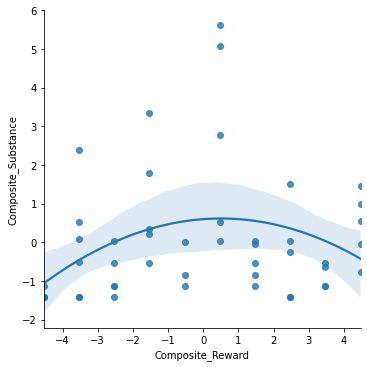

In [7]:
sms.lmplot(x='Composite_Reward',y='Composite_Substance',data=df,order=2)
from scipy.stats import pearsonr
r,p=pearsonr(x=df['Composite_Reward_Squared'],y=df['Composite_Substance'])
print("Correlation R^2:%s p: %s"%(r**2,p))

## Collecting VS activation for Each subject

/data/projects/istart-mid/derivatives/fsl/sub-1001/L2_task-mid_model-1_type-act.gfeat/cope1.feat/stats/cope1.nii.gz


,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Act Gain>Loss,Act Gain>Neut,Act Loss>Neut,Act Salience,Act Hit-Miss,Act LG-SG,Act LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,6.205069,-16.777603,-22.002108,36.927776,-31.690548,17.066702,22.209206
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,17.534353,93.007965,75.473610,140.673752,-60.986187,27.042622,10.579357
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,44.437790,11.018167,-31.683567,-28.200232,104.370735,-24.435888,7.748005
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,29.858534,38.924698,9.066165,28.652117,-46.139599,2.657486,0.446972
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,33.368916,122.780022,88.890198,90.083115,151.678345,19.526897,-28.526485


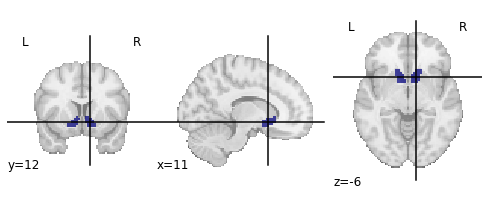

In [8]:
data=[]
cope_map={1:'Large Gain', 2: 'Small Gain',
          3: 'Large Loss', 4: 'Small Loss', 5: 'Hit',
         6:'Miss',7:'Neutral',8:'Gain>Loss',9:'Gain>Neut',
         10:'Loss>Neut',11:'Salience',12:'Hit-Miss',
          13:'LG-SG',14:'LL-SL'}
print(df['Fnames-act'][0])
for fname in df['Fnames-act']:
    sub=re.search('fsl/(.*)/L',fname).group(1)
    level=re.search('sub-..../(.*)_task',fname).group(1)
    activations=[]
    cope_list=[]
    for cope in [8,9,10,11,12,13,14]:
        
        if level=='L1':
            image='%s/%s/L1_task-mid_model-1_type-act_run-1.feat/stats/cope%s.nii.gz'%(
            fsl_data,sub,cope)
        if level=='L2':
            image='%s/%s/L2_task-mid_model-1_type-act.gfeat/cope%s.feat/stats/cope1.nii.gz'%(
            fsl_data,sub,cope)
        
        act_value_array=vs_masker.fit_transform(image)
        act_value=np.mean(act_value_array)
        activations.append(act_value)
        cope_list.append(cope)
    data.append([sub]+activations)

neuro_df=pd.DataFrame(data=data,columns=['Subject','Act Gain>Loss','Act Gain>Neut',
         'Act Loss>Neut','Act Salience','Act Hit-Miss','Act LG-SG','Act LL-SL'])
big_df=pd.merge(df,neuro_df,on='Subject')
display(big_df.head())
plotting.plot_roi(vs_masker.mask_img_)


In [9]:
big_df.head()
big_df.to_csv("For_David_VSAct.tsv",sep='\t',index=False)

## Reward Sensitivity and VS Activation

Correlation between Act Gain>Loss and Composite Reward: 
 R^2 0.023845530544171184 p: 0.3000269245494836


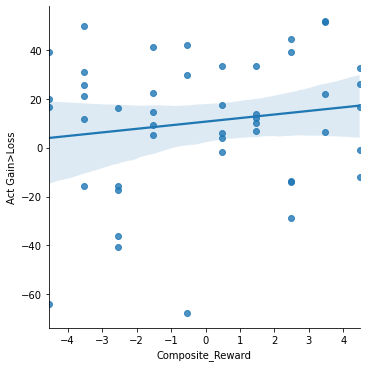

Correlation between Act Gain>Loss and Squared Composite Reward: 
 R^2 0.0023555952655911335 p: 0.745963155633228


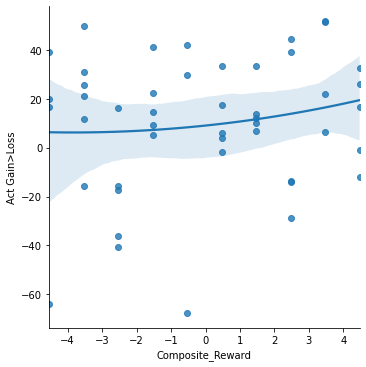

Correlation between Act Gain>Neut and Composite Reward: 
 R^2 0.007258989979423084 p: 0.5690790648352174


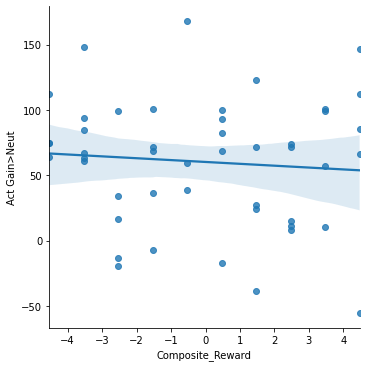

Correlation between Act Gain>Neut and Squared Composite Reward: 
 R^2 0.03209861065843534 p: 0.22821508302963345


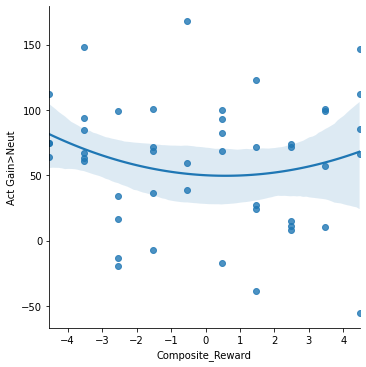

Correlation between Act Loss>Neut and Composite Reward: 
 R^2 0.024637195424330696 p: 0.2920422290155928


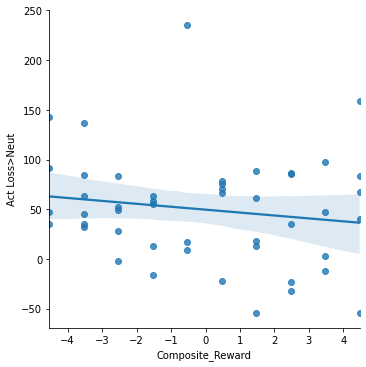

Correlation between Act Loss>Neut and Squared Composite Reward: 
 R^2 0.020162723204321713 p: 0.3410488993829558


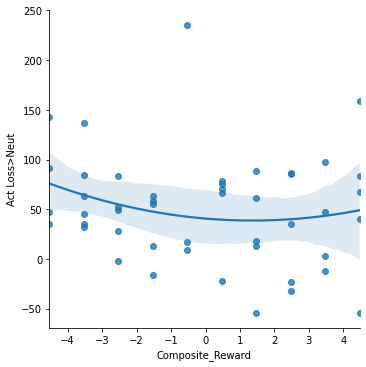

Correlation between Act Salience and Composite Reward: 
 R^2 0.0043932572350874255 p: 0.6580149917307546


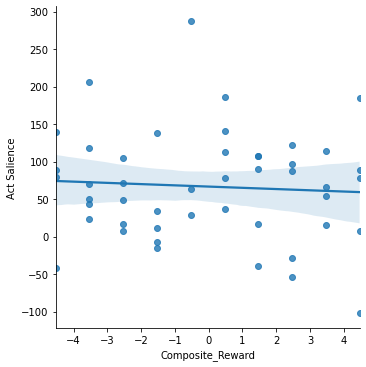

Correlation between Act Salience and Squared Composite Reward: 
 R^2 0.007120839672683757 p: 0.5727920467497306


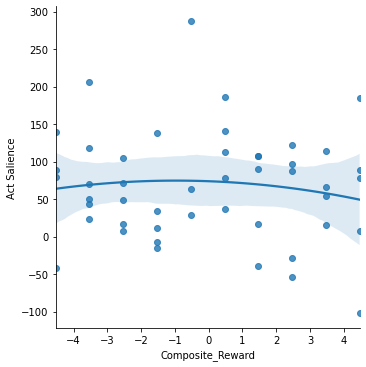

Correlation between Act Hit-Miss and Composite Reward: 
 R^2 0.02992774079654626 p: 0.2448862605011443


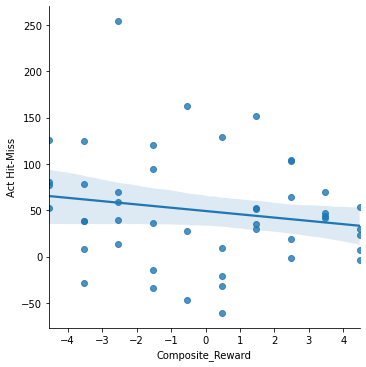

Correlation between Act Hit-Miss and Squared Composite Reward: 
 R^2 0.0035061913224264294 p: 0.6925767300516514


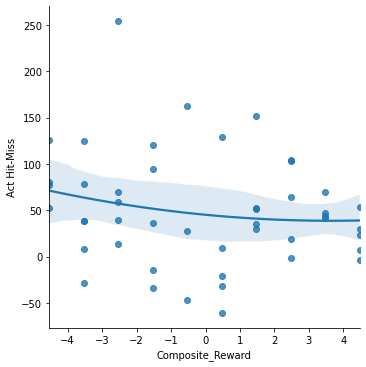

Correlation between Act LG-SG and Composite Reward: 
 R^2 0.03812108002812773 p: 0.18844408267073628


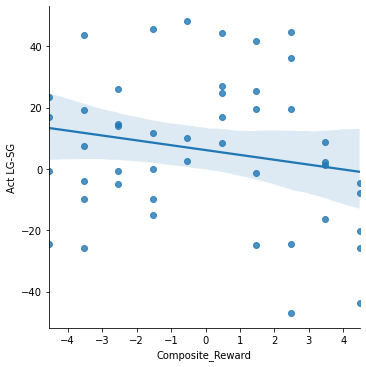

Correlation between Act LG-SG and Squared Composite Reward: 
 R^2 0.1582007864296785 p: 0.005629506303278012


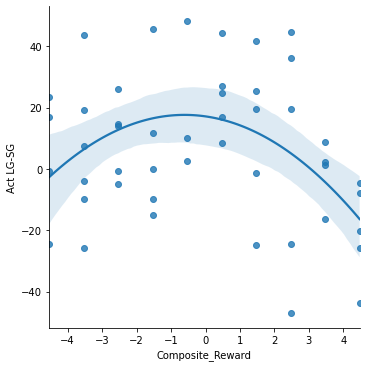

Correlation between Act LL-SL and Composite Reward: 
 R^2 0.1091767157475712 p: 0.02330681958108417


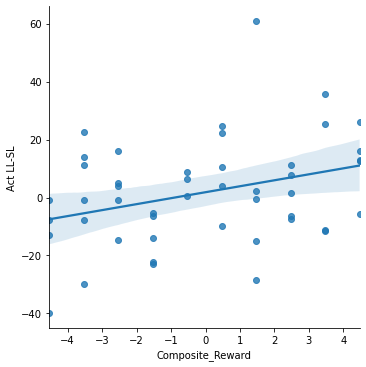

Correlation between Act LL-SL and Squared Composite Reward: 
 R^2 0.0003872108035442503 p: 0.8955511823133154


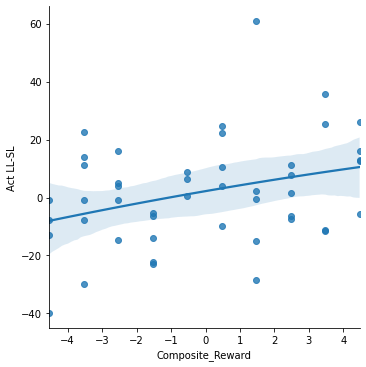

In [10]:
copes=[col for col in big_df.columns if col.startswith('Act')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df)
    plt.show()
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df,order=2)
    plt.show()

## Substance Use and VS Activation

Correlation between Act Gain>Loss and Substance Use: 
 R^2 0.005718625389998625 p: 0.6134185888345356


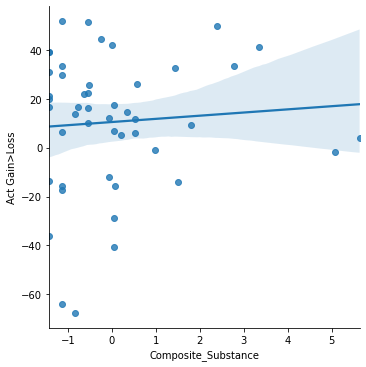

Correlation between Act Gain>Neut and Substance Use: 
 R^2 0.004498481397995701 p: 0.6541986745435381


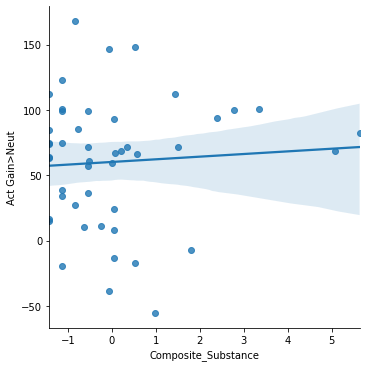

Correlation between Act Loss>Neut and Substance Use: 
 R^2 0.00037822248450688703 p: 0.8967639480290486


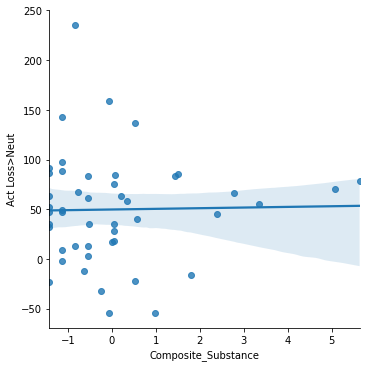

Correlation between Act Salience and Substance Use: 
 R^2 0.026635129745591003 p: 0.2730340042819388


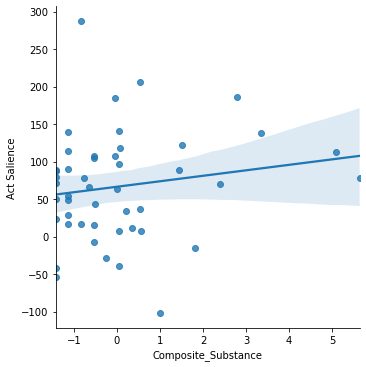

Correlation between Act Hit-Miss and Substance Use: 
 R^2 0.025280692558875738 p: 0.28574645955464334


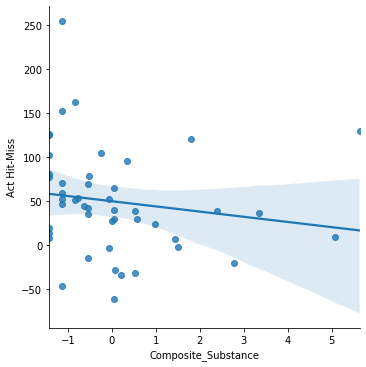

Correlation between Act LG-SG and Substance Use: 
 R^2 0.05918641882977506 p: 0.09939132876957273


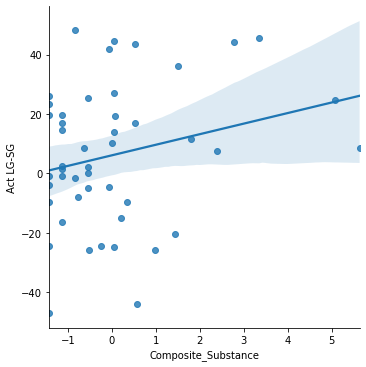

Correlation between Act LL-SL and Substance Use: 
 R^2 0.0013784386859684885 p: 0.804317337311261


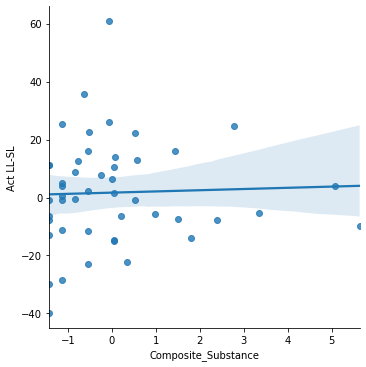

In [11]:
copes=[col for col in big_df.columns if col.startswith('Act')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Substance'],big_df[col])
    print("Correlation between %s and Substance Use: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Substance',y=col,
               data=big_df)
    plt.show()
    #r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    #print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    #col,r,p))
    #sms.lmplot(x='Composite_Reward',y=col,
    #           data=big_df,order=2)
    #plt.show()

## Interaction with Substance Use


In [12]:
big_df["Low_Substance"] = (big_df.Composite_Substance<df.Composite_Substance.quantile()).replace({True:'Low', False:'High'})

Correlation between Act Gain>Loss and Composite Reward: 
 R^2 0.023845530544171184 p: 0.3000269245494836


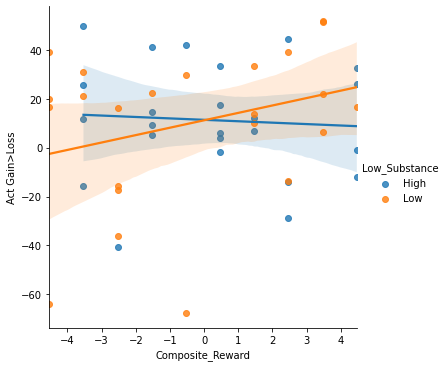

Correlation between Act Gain>Loss and Squared Composite Reward: 
 R^2 0.0023555952655911335 p: 0.745963155633228


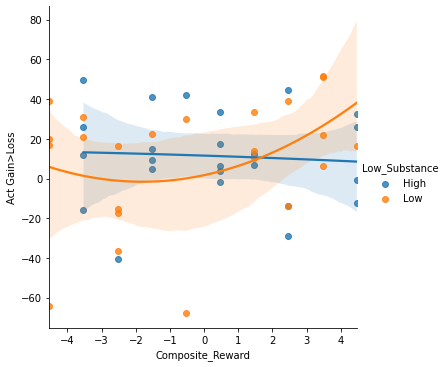

Correlation between Act Gain>Neut and Composite Reward: 
 R^2 0.007258989979423084 p: 0.5690790648352174


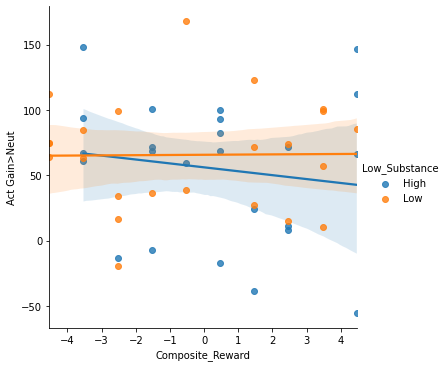

Correlation between Act Gain>Neut and Squared Composite Reward: 
 R^2 0.03209861065843534 p: 0.22821508302963345


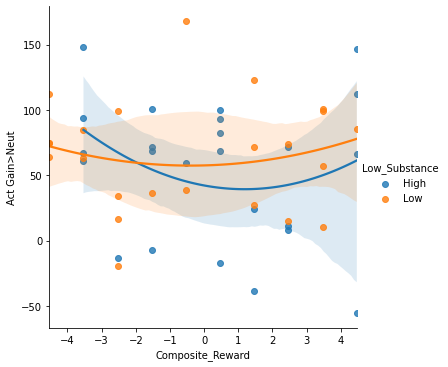

Correlation between Act Loss>Neut and Composite Reward: 
 R^2 0.024637195424330696 p: 0.2920422290155928


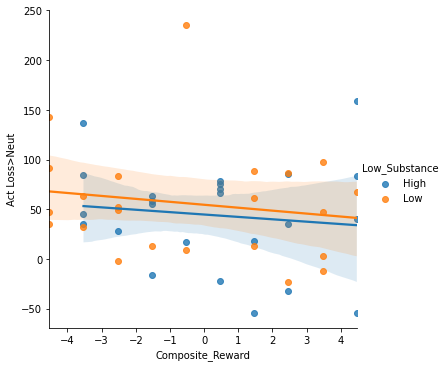

Correlation between Act Loss>Neut and Squared Composite Reward: 
 R^2 0.020162723204321713 p: 0.3410488993829558


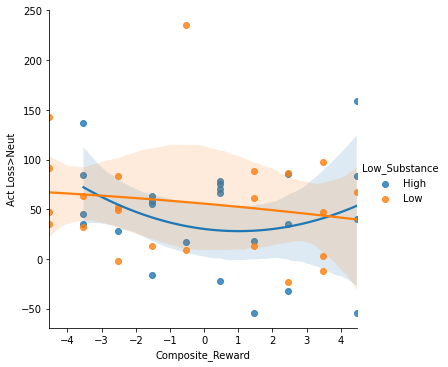

Correlation between Act Salience and Composite Reward: 
 R^2 0.0043932572350874255 p: 0.6580149917307546


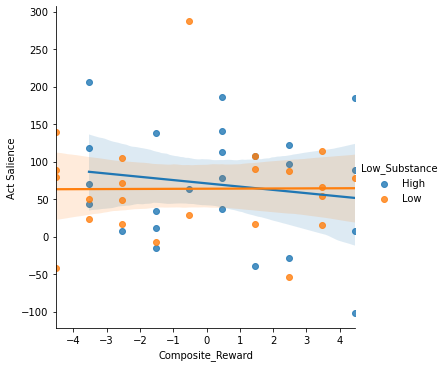

Correlation between Act Salience and Squared Composite Reward: 
 R^2 0.007120839672683757 p: 0.5727920467497306


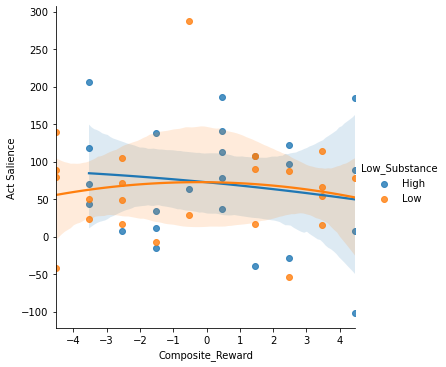

Correlation between Act Hit-Miss and Composite Reward: 
 R^2 0.02992774079654626 p: 0.2448862605011443


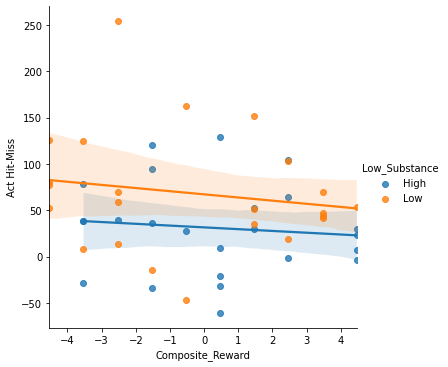

Correlation between Act Hit-Miss and Squared Composite Reward: 
 R^2 0.0035061913224264294 p: 0.6925767300516514


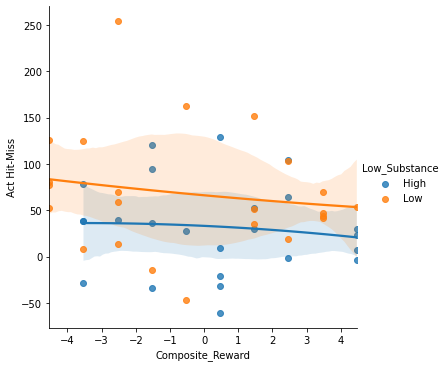

Correlation between Act LG-SG and Composite Reward: 
 R^2 0.03812108002812773 p: 0.18844408267073628


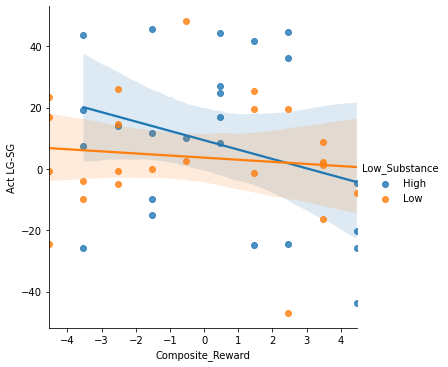

Correlation between Act LG-SG and Squared Composite Reward: 
 R^2 0.1582007864296785 p: 0.005629506303278012


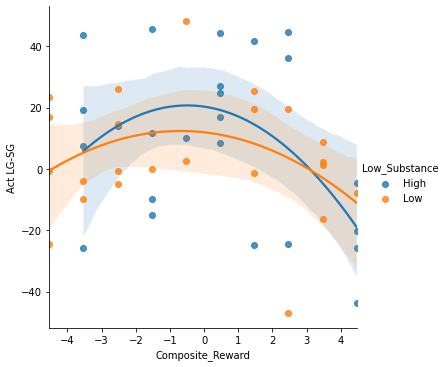

Correlation between Act LL-SL and Composite Reward: 
 R^2 0.1091767157475712 p: 0.02330681958108417


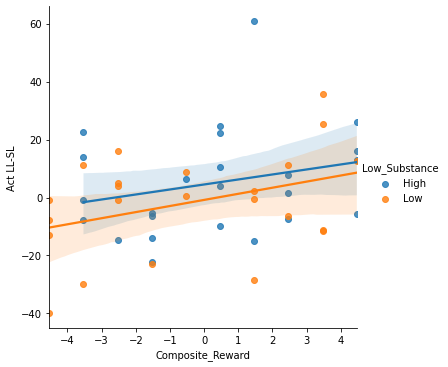

Correlation between Act LL-SL and Squared Composite Reward: 
 R^2 0.0003872108035442503 p: 0.8955511823133154


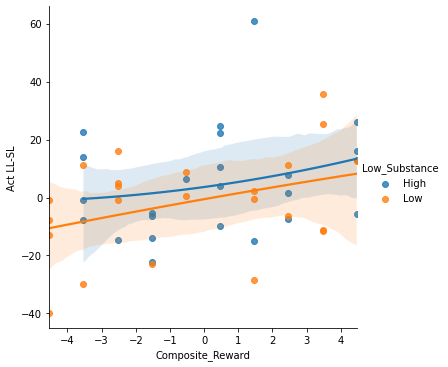

In [13]:
copes=[col for col in big_df.columns if col.startswith('Act')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df)
    plt.show()
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df,order=2)
    plt.show()

# PscyhoPhysiological Interactions

In [14]:
ofc_coords=[2,46,-8]
from nilearn import input_data

seed_masker = input_data.NiftiSpheresMasker(
    ofc_coords, radius=8)
data=[]
cope_map={1:'Large Gain', 2: 'Small Gain',
          3: 'Large Loss', 4: 'Small Loss', 5: 'Hit',
         6:'Miss',7:'Neutral',8:'Gain>Loss',9:'Gain>Neut',
         10:'Loss>Neut',11:'Salience',12:'Hit-Miss',
          13:'LG-SG',14:'LL-SL'}
print(df['Fnames-act'][0])
for fname in df['Fnames-act']:
    sub=re.search('fsl/(.*)/L',fname).group(1)
    level=re.search('sub-..../(.*)_task',fname).group(1)
    activations=[]
    cope_list=[]
    display(sub)
    for cope in [8,9,10,11,12,13,14]:
        
        if level=='L1':
            image='%s/%s/L1_task-mid_model-1_type-ppi_seed-NAcc_run-1_sm-.feat/stats/cope%s.nii.gz'%(
            fsl_data,sub,cope)
        if level=='L2':
            image='%s/%s/L2_task-mid_model-1_type-ppi_seed-NAcc.gfeat/cope%s.feat/stats/cope1.nii.gz'%(
            fsl_data,sub,cope)
        
        act_value_array=vs_masker.fit_transform(image)
        act_value=np.mean(act_value_array)
        activations.append(act_value)
        cope_list.append(cope)
    data.append([sub]+activations)

conn_df=pd.DataFrame(data=data,columns=['Subject','Conn Gain>Loss','Conn Gain>Neut',
         'Conn Loss>Neut','Conn Salience','Conn Hit-Miss','Conn LG-SG','Conn LL-SL'])
big_df=pd.merge(big_df,conn_df,on='Subject')
display(big_df.head())

/data/projects/istart-mid/derivatives/fsl/sub-1001/L2_task-mid_model-1_type-act.gfeat/cope1.feat/stats/cope1.nii.gz


'sub-1001'

'sub-1003'

'sub-1004'

'sub-1006'

'sub-1009'

'sub-1010'

'sub-1011'

'sub-1012'

'sub-1013'

'sub-1015'

'sub-1016'

'sub-1019'

'sub-1021'

'sub-1242'

'sub-1243'

'sub-1244'

'sub-1245'

'sub-1247'

'sub-1248'

'sub-1249'

'sub-1255'

'sub-1276'

'sub-1282'

'sub-1286'

'sub-1294'

'sub-1300'

'sub-1301'

'sub-1302'

'sub-1303'

'sub-3116'

'sub-3125'

'sub-3140'

'sub-3143'

'sub-3166'

'sub-3167'

'sub-3170'

'sub-3173'

'sub-3175'

'sub-3176'

'sub-3189'

'sub-3190'

'sub-3199'

'sub-3200'

'sub-3206'

'sub-3212'

'sub-3218'

'sub-3220'

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,...,Act LG-SG,Act LL-SL,Low_Substance,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,...,17.066702,22.209206,High,-0.022441,0.062319,0.087859,0.012782,-0.088774,-0.018264,-0.019006
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,...,27.042622,10.579357,High,-0.300095,-0.003371,0.296723,0.217825,-0.190221,-0.006840,0.054273
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,...,-24.435888,7.748005,High,-0.065485,-0.254023,-0.235044,-0.296948,-0.150485,-0.016390,-0.035103
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,...,2.657486,0.446972,Low,-0.045803,-0.166833,-0.121030,-0.074232,-0.876167,-0.111085,0.157551
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,...,19.526897,-28.526485,Low,0.101763,-0.204807,-0.314009,-0.291955,-0.041572,0.017997,-0.034031


In [15]:
big_df.head()
big_df.to_csv("For_David_VSAct_ConnOFC_2-46--8.tsv",sep='\t',index=False)

## Reward Sensitivity and OFC Connections

Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 -0.17398981882290354 p: 0.24214522523632512


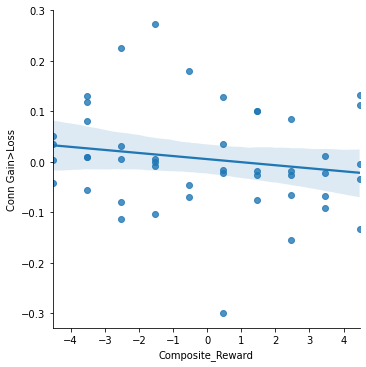

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.05035724141299257 p: 0.7367585386133759


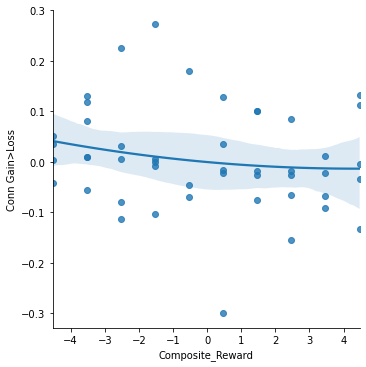

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.035217625866721405 p: 0.8141999532318281


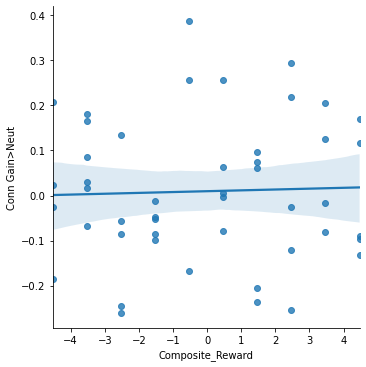

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.008082321233746428 p: 0.9570001842802874


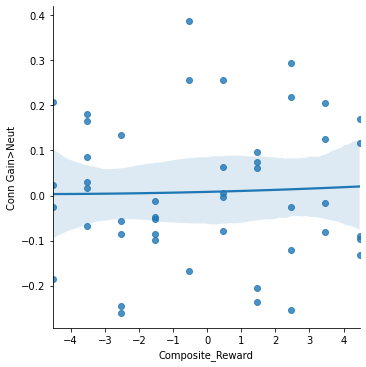

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.13772901929658504 p: 0.35589934472848817


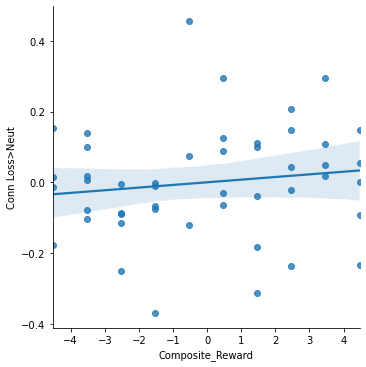

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 -0.006643136741133052 p: 0.9646516113652186


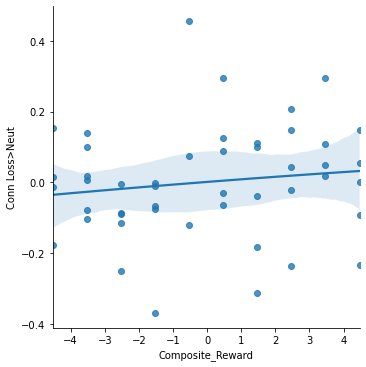

Correlation between Conn Salience and Composite Reward: 
 R^2 -0.03307913052476685 p: 0.8253004895268615


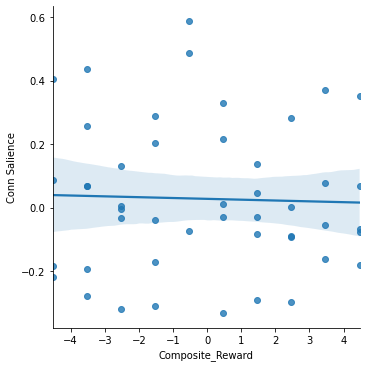

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 -0.03619619395295699 p: 0.8091322453550243


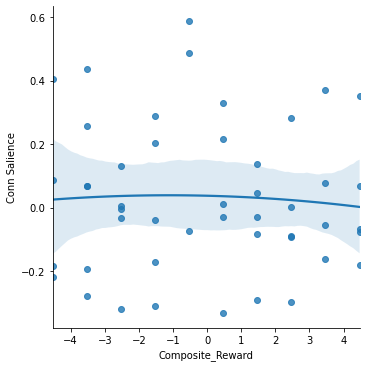

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.15055150058819514 p: 0.3124434260046607


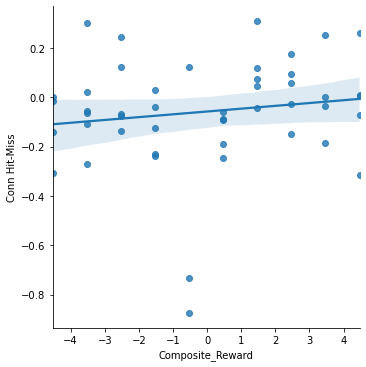

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.13552068512461402 p: 0.36373827077814874


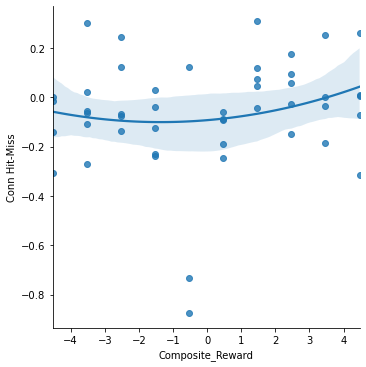

Correlation between Conn LG-SG and Composite Reward: 
 R^2 -0.060651677842819635 p: 0.6854896649958342


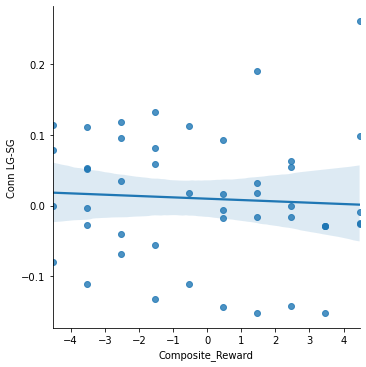

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.11619192588443408 p: 0.4367095252529004


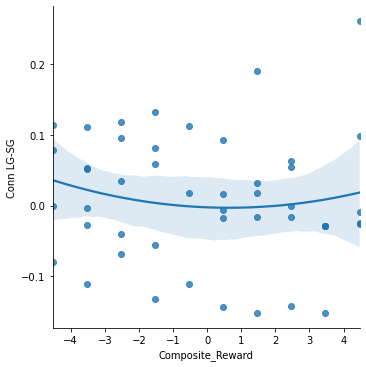

Correlation between Conn LL-SL and Composite Reward: 
 R^2 -0.14778194088362012 p: 0.32153074003738075


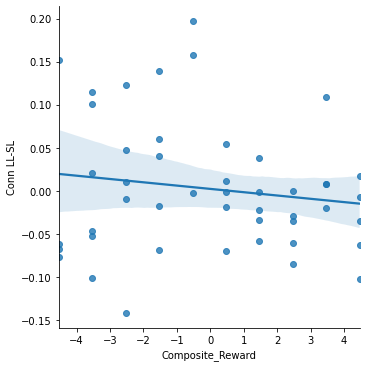

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 -0.2004144603081779 p: 0.17678362761585018


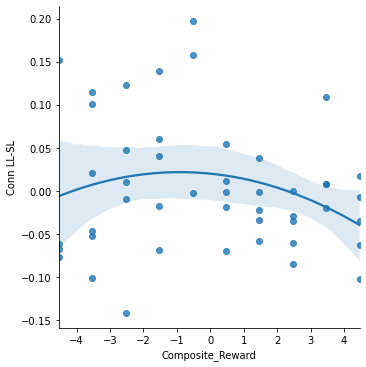

In [16]:
copes=[col for col in big_df.columns if col.startswith('Conn')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df)
    plt.show()
    
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df,order=2)
    plt.show()

## Interaction with Substance Use


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 -0.17398981882290354 p: 0.24214522523632512


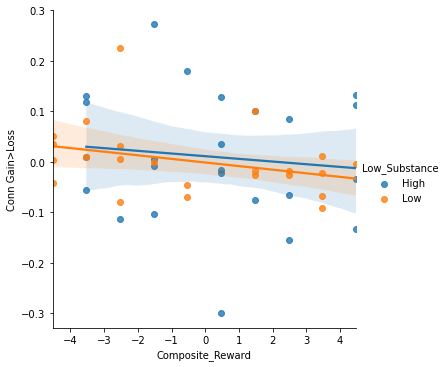

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.05035724141299257 p: 0.7367585386133759


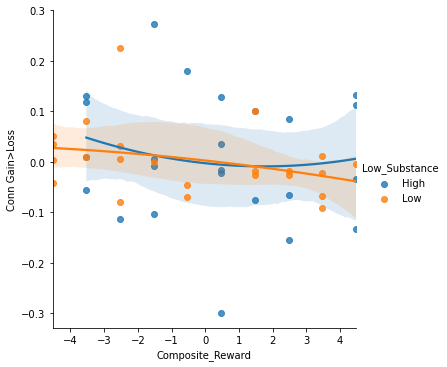

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.035217625866721405 p: 0.8141999532318281


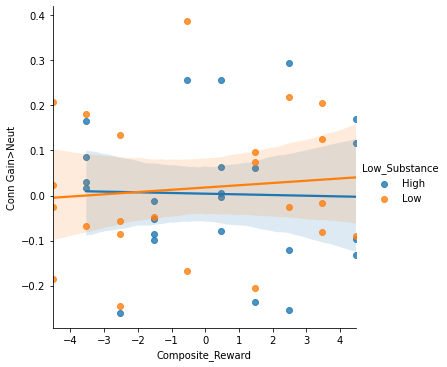

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.008082321233746428 p: 0.9570001842802874


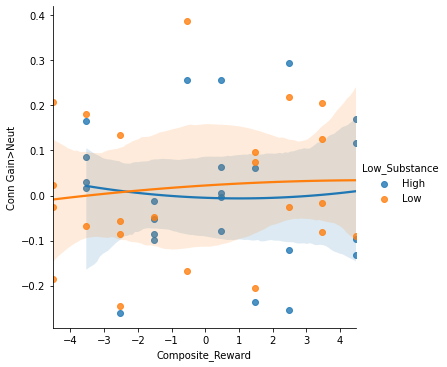

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.13772901929658504 p: 0.35589934472848817


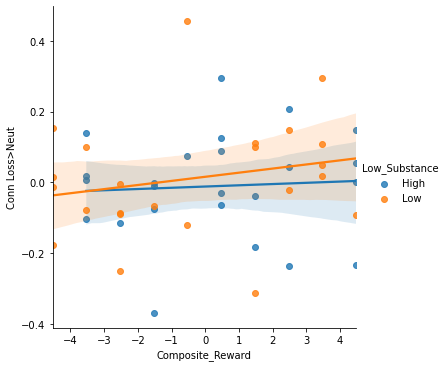

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 -0.006643136741133052 p: 0.9646516113652186


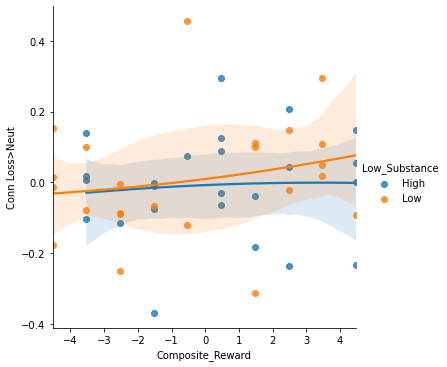

Correlation between Conn Salience and Composite Reward: 
 R^2 -0.03307913052476685 p: 0.8253004895268615


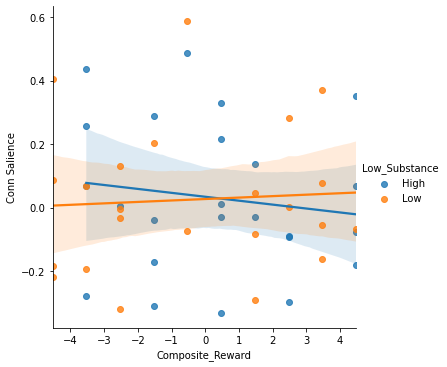

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 -0.03619619395295699 p: 0.8091322453550243


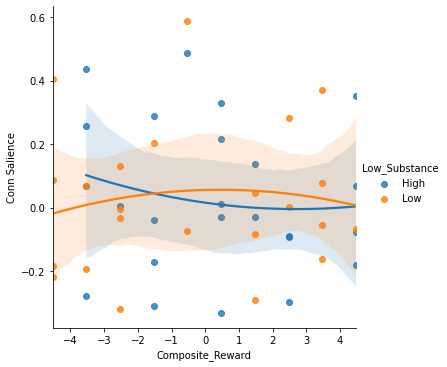

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.15055150058819514 p: 0.3124434260046607


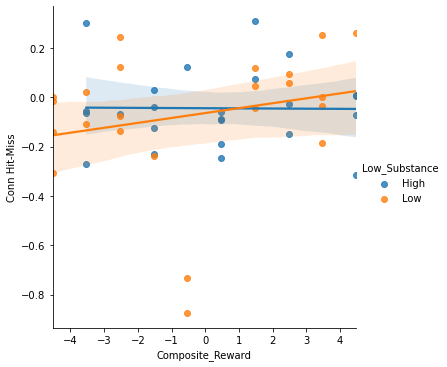

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.13552068512461402 p: 0.36373827077814874


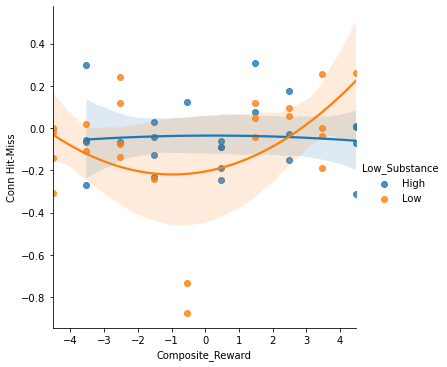

Correlation between Conn LG-SG and Composite Reward: 
 R^2 -0.060651677842819635 p: 0.6854896649958342


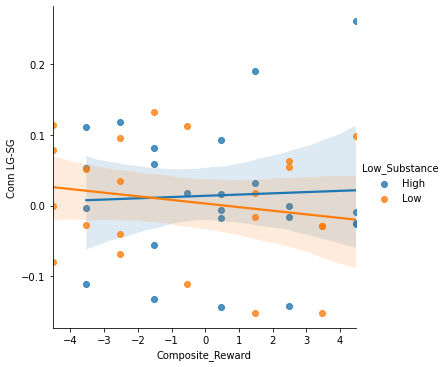

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.11619192588443408 p: 0.4367095252529004


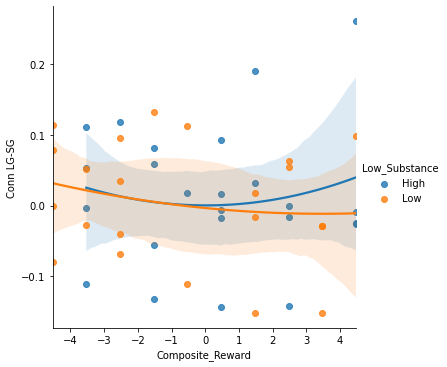

Correlation between Conn LL-SL and Composite Reward: 
 R^2 -0.14778194088362012 p: 0.32153074003738075


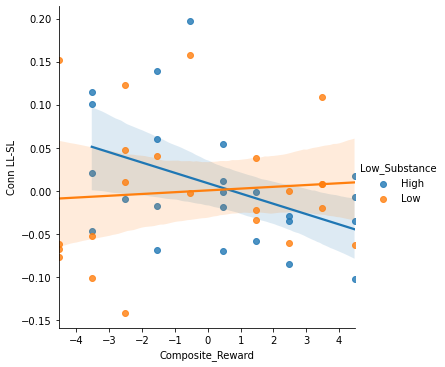

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 -0.2004144603081779 p: 0.17678362761585018


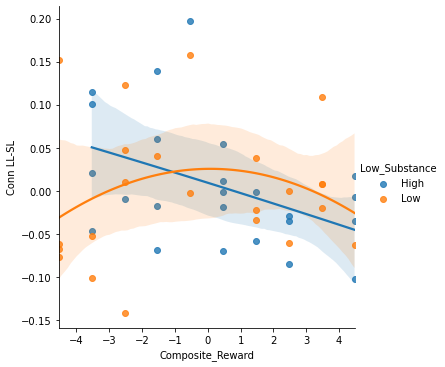

In [17]:
copes=[col for col in big_df.columns if col.startswith('Conn')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df)
    plt.show()
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df,order=2)
    plt.show()

## Other Masks


Mask =../masks/conn_rightVS_dACC.nii.gz


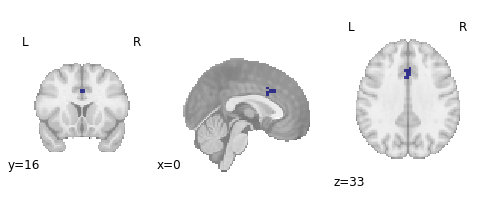

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,-0.389643,-0.254268,0.124599,-0.445922,-0.408693,-0.129302,-0.129134
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-0.353217,-0.024155,0.329063,1.417827,-0.745640,-0.485315,1.328897
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.181996,-0.997005,-0.851994,-1.744463,-0.065861,-0.250595,-0.285428
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,-0.185208,0.295336,0.480544,0.496597,-1.397243,-0.083319,0.155757
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.156856,1.133577,0.980744,1.000252,-0.323107,0.431348,-0.460419


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.0646481022935332 p: 0.08459053870726835


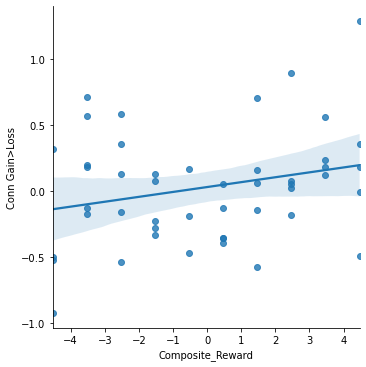

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.01745658078618626 p: 0.3759996082500132


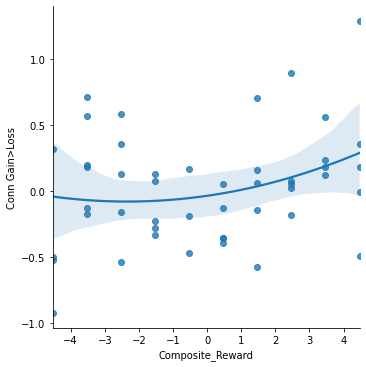

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.005035380947923669 p: 0.6355151469255939


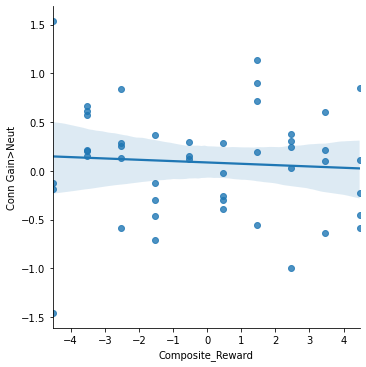

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.0003217903031450916 p: 0.9047380386469837


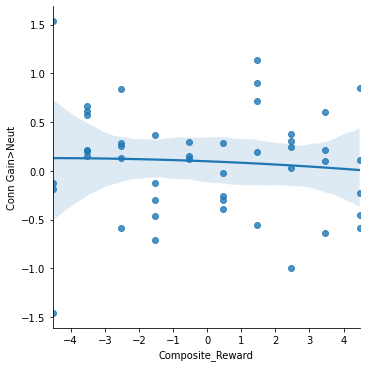

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.11390555571682666 p: 0.02034074932361379


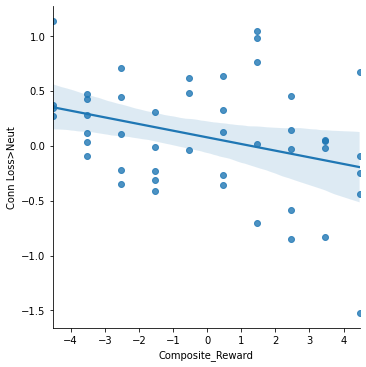

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.004514354712877436 p: 0.6536276130933057


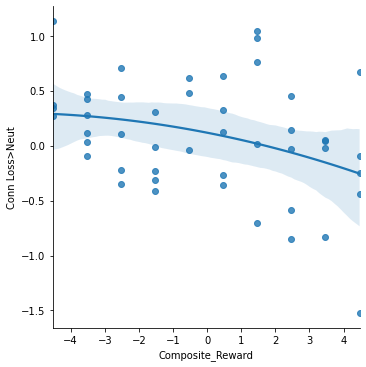

Correlation between Conn Salience and Composite Reward: 
 R^2 0.05819975860351368 p: 0.10234402782667112


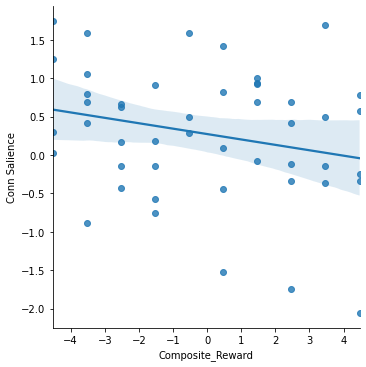

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.0004946832997113599 p: 0.8820332337425539


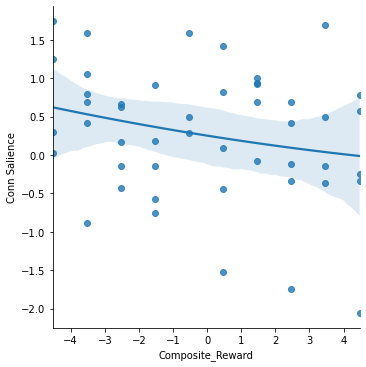

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.0034009872895639118 p: 0.696999675991353


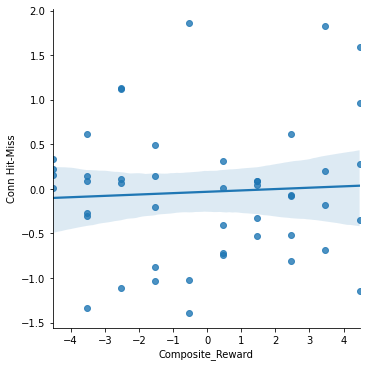

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.045085029402405497 p: 0.15189306641114456


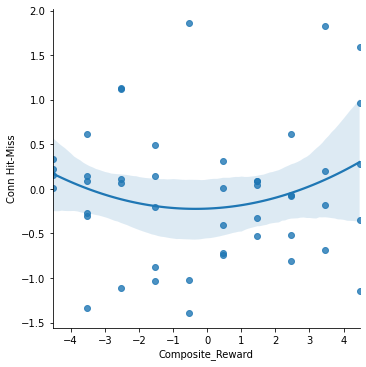

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.03444600014631909 p: 0.21166240740377318


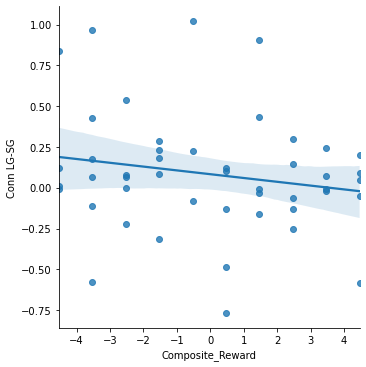

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.0004613624719655003 p: 0.8860483448879691


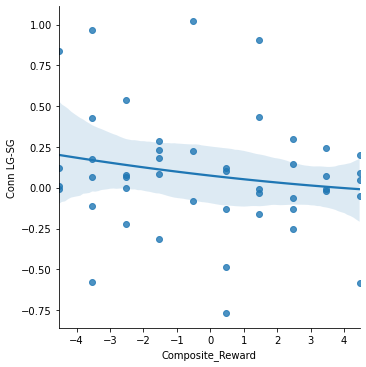

Correlation between Conn LL-SL and Composite Reward: 
 R^2 4.6864090145909296e-05 p: 0.9635742904526998


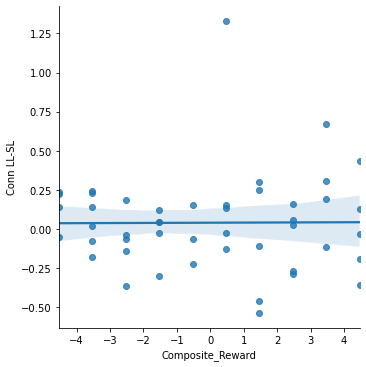

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.004389155102091739 p: 0.6581648667232106


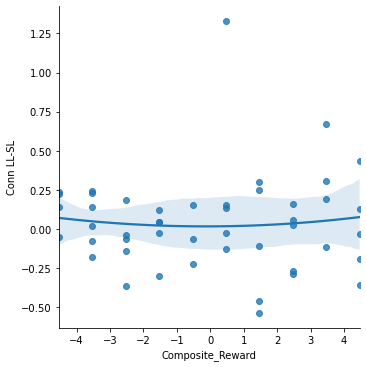

In [30]:
import os
from scipy.stats import pearsonr, spearmanr
masks=['../masks/'+mask for mask in os.listdir('../masks') if mask.startswith('conn_')]
masks=[f for f in masks if 'rightVS_dACC' in f]
for mask in masks: # Looping through all of David's requested masks
    roi=re.search("conn_(.*).nii.gz",mask).group(1)
    print("Mask =%s"%(mask))
    plotting.plot_roi(mask,draw_cross=False)
    vs_masker=input_data.NiftiMasker(mask_img=mask)
    plt.show()
    
    data=[] #looping through all of the connectivity analyses
    for fname in df['Fnames-act']:
        sub=re.search('fsl/(.*)/L',fname).group(1)
        level=re.search('sub-..../(.*)_task',fname).group(1)
        activations=[]
        cope_list=[]
        for cope in [8,9,10,11,12,13,14]:#Looping through all of the contrasts

            if level=='L1':#Seperating out if they have only 1 or 2 runs
                image='%s/%s/L1_task-mid_model-1_type-ppi_seed-NAcc_run-1_sm-.feat/stats/cope%s.nii.gz'%(
                fsl_data,sub,cope)
            if level=='L2':
                image='%s/%s/L2_task-mid_model-1_type-ppi_seed-NAcc.gfeat/cope%s.feat/stats/cope1.nii.gz'%(
                fsl_data,sub,cope)

            act_value_array=vs_masker.fit_transform(image)
            act_value=np.mean(act_value_array)
            activations.append(act_value)
            cope_list.append(cope)
        data.append([sub]+activations)

    conn_df=pd.DataFrame(data=data,columns=['Subject','Conn Gain>Loss','Conn Gain>Neut',
             'Conn Loss>Neut','Conn Salience','Conn Hit-Miss','Conn LG-SG','Conn LL-SL'])
    big_df.to_csv("ForDavid_customMasks_%s.tsv"%(roi),sep='\t')
    big_df=pd.merge(df,conn_df,on='Subject')
    display(big_df.head())
    copes=[col for col in big_df.columns if col.startswith('Conn')]
    for col in copes:
        r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
        print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
        col,r**2,p))
        sms.lmplot(x='Composite_Reward',y=col,
                   data=big_df)
        plt.savefig("figures/VSConn_mask-%s_Contr-%s.svg"%(roi,col))
        plt.show()

        r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
        print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
        col,r**2,p))
        sms.lmplot(x='Composite_Reward',y=col,
                   data=big_df,order=2)
        plt.show()

In [28]:
masks=['../masks/'+mask for mask in os.listdir('../masks') if mask.startswith('conn_')]
print(masks)


['../masks/conn_leftVS_LPFC.nii.gz', '../masks/conn_leftVS_dACC.nii.gz', '../masks/conn_rightVS_vPrecun.nii.gz', '../masks/conn_rightVS_dPrecun.nii.gz', '../masks/conn_rFPN_VLPFC.nii.gz', '../masks/conn_rightVS_dACC.nii.gz', '../masks/conn_rightVS_VMPFC_cov.nii.gz', '../masks/conn_rightVS_DLPFC_cov.nii.gz', '../masks/conn_leftVS_visual.nii.gz', '../masks/conn_rFPN_precun.nii.gz']


In [29]:
masks

['../masks/conn_rightVS_dACC.nii.gz']